# Linear Regression is Machine Learning

In [1]:
from utils.statsimport import *

In [2]:
m_true, b_true = np.array([-1, 1]), 1

def f(x, m, b): return np.dot(m, np.array(x).T) + b

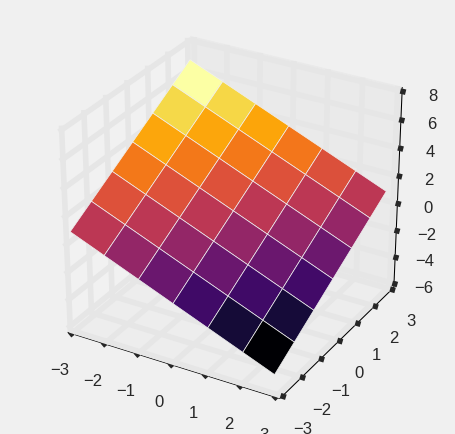

In [3]:
plot_surfaces(f, [-3, 3], [-3, 3], step=0.1, f_params=[m_true, b_true])

# Solve Model Parameters

Determine the parameters $M$ and $b$ for any arbitary set of $(x, y)$ points.

for the simple regression $ f(x) = mx + b$

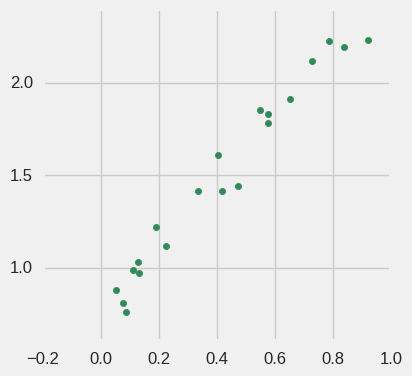

In [15]:
# Parameters
sample_size = 20
m_true, b_true = 1.8, 0.75

# Fake Data
x = np.random.rand(sample_size)
y = f(x, m_true, b_true) + np.random.normal(loc=0, scale=0.1,size=sample_size)

# Graph results
graph.scatter(x, y, color='seagreen')
graph.show()

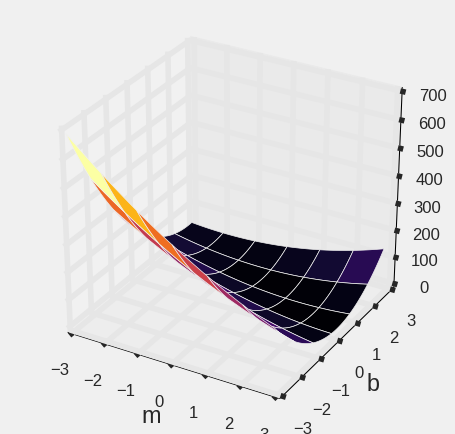

In [16]:
#%matplotlib notebook
# Make a cost function
def f(x_in, m_in, b_in):
    m_in, b_in, x_in = np.array(m_in), np.array(b_in), np.array(x_in)
    return np.dot(m_in, x_in.T) + b_in

def L(params, xi, yi):
    m_in, b_in = params
    return np.sum((yi - f(xi, m_in, b_in)) ** 2)

plot_surfaces(L, [-3, 3], [-3, 3], step=0.1, f_params=[x, y], xlabel='m', ylabel='b')

In [6]:
# Get the derivative
def approx_J(m_in, b_in, alpha=1e-15):
    partial_m = (L([m_in + alpha, b_in], x, y) - L([m_in, b_in], x, y)) / alpha
    partial_b = (L([m_in, b_in + alpha], x, y) - L([m_in, b_in], x, y)) / alpha
    return partial_m, partial_b
    
print(approx_J(-3, -1))

(-56.843418860808008, -170.53025658242404)


In [19]:
# Move downhill until you reach d/d ~ 0
def fit(tolerance=1e-15, learning_rate=0.03, term=250):
    i = 0
    m_found, b_found = 0, 0
    last_cost = float('inf')
    
    while np.abs(last_cost - L([m_found, b_found], x, y)) > tolerance:
        last_cost = L([m_found, b_found], x, y)
        print('{}: {} ({}, {})'.format(i, last_cost, m_found, b_found))
        
        # Move
        gradient = approx_J(m_found, b_found)
        m_found += (gradient[0] * -learning_rate)
        b_found += (gradient[1] * -learning_rate)
        
        if i > term:
            print('Early Termination')
            break
        i += 1
            
    return round(m_found, 6), round(b_found, 6)

fit()

0: 49.29334667740964 (0, 0)
1: 24.268461594321067 (1.0658141036401503, 2.1316282072803006)
2: 5.954449581105729 (0.5329070518200751, 0.8526512829121202)
3: 2.4221119864472263 (0.879296635503124, 1.3589129821411916)
4: 1.8079939311532924 (0.8126832540256146, 1.0391687510491465)
5: 1.3281045014150155 (0.9459100169806334, 1.1857181902996672)
6: 1.0882993324946562 (0.985878045867139, 1.0724754417879012)
7: 0.9343300149038852 (1.0591527654923993, 1.0791367799356522)
8: 0.7947595458850112 (1.1290968160437842, 1.0524914273446484)
9: 0.678219498207113 (1.1957101975212936, 1.0291767438275201)
10: 0.5918900562856076 (1.2356782264077992, 0.985878045867139)
11: 0.5286325259284725 (1.2889689315898067, 0.9892087149410145)
12: 0.4727997145674524 (1.3156142841808105, 0.9492406860545088)
13: 0.41969962139108313 (1.3589129821411916, 0.9425793479067579)
14: 0.3796293025914251 (1.3905543383430086, 0.9225953334635051)
15: 0.34376587170495887 (1.425526363618701, 0.9142686607788164)
16: 0.3165519896662167 (1

(1.7344459999999999, 0.77937699999999999)

In [18]:
from scipy.optimize import minimize

objective = minimize(L, x0=np.array([0, 0]), args=(x, y), method='SLSQP')
print(objective)

     fun: 0.16306688897724653
     jac: array([  6.33299351e-08,   2.44006515e-07,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 1.7697633 ,  0.76053082])
